In [1]:
#Basic libraries
import numpy as np
import pandas as pd
#visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns


In [2]:
#Evalutation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:
#Deep Learning Libraries
import tensorflow as tf
import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [4]:
fashion_train=pd.read_csv("fashion-mnist_train.csv")
fashion_test=pd.read_csv("fashion-mnist_test.csv")

In [5]:
fashion_train.shape

(60000, 785)

In [6]:
X_train_fashion = fashion_train.drop('label',axis=1)
y_train_fashion = fashion_train ['label']
X_test_fashion = fashion_test.drop('label',axis=1)
y_test_fashion = fashion_test ['label']
#only input and only output

In [7]:
#reshaping the dataset
x_train_reshape=X_train_fashion.values.reshape(-1,28,28)
x_test_reshape= X_test_fashion.values.reshape(-1,28,28)

In [8]:
#Names of the clothing in order
col_name=['T-Shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

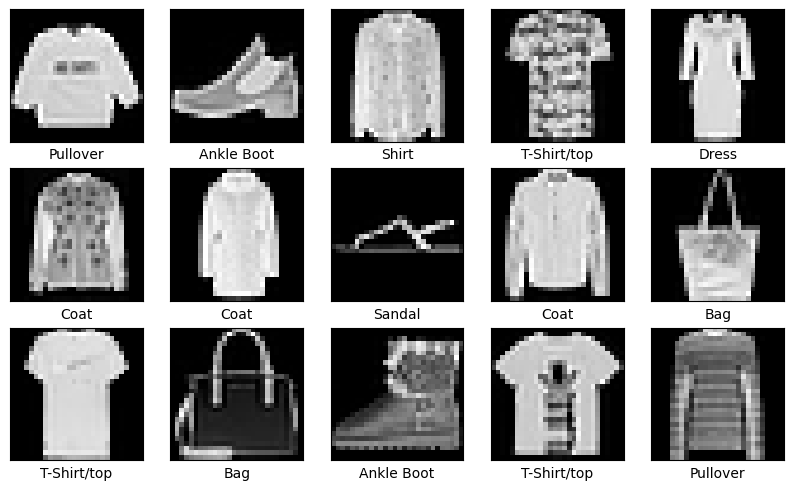

In [9]:
#Visualizing the image
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_reshape[i],cmap='gray')
    plt.xlabel(col_name[y_train_fashion[i]])
plt.show()

In [10]:
#One-Hot Encoding

y_train_fashion=to_categorical(y_train_fashion, num_classes=10)
y_test_fashion=to_categorical(y_test_fashion, num_classes=10)


In [11]:
#creating base neural network

model=keras.Sequential([
    layers.Dense(128,activation='relu',input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10,activation='softmax'),])

In [12]:
#compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

In [13]:
#Fitting the model
history=model.fit(X_train_fashion,y_train_fashion, batch_size=100, epochs=30, validation_data=(X_test_fashion, y_test_fashion))

Epoch 1/30
600/600 [==============================] - 16s 12ms/step - loss: 1.0991 - accuracy: 0.6263 - val_loss: 0.5508 - val_accuracy: 0.8195
Epoch 2/30
600/600 [==============================] - 6s 10ms/step - loss: 0.7345 - accuracy: 0.7505 - val_loss: 0.4614 - val_accuracy: 0.8466
Epoch 3/30
600/600 [==============================] - 6s 11ms/step - loss: 0.6627 - accuracy: 0.7782 - val_loss: 0.4492 - val_accuracy: 0.8501
Epoch 4/30
600/600 [==============================] - 5s 9ms/step - loss: 0.6289 - accuracy: 0.7891 - val_loss: 0.4478 - val_accuracy: 0.8483
Epoch 5/30
600/600 [==============================] - 6s 9ms/step - loss: 0.6034 - accuracy: 0.7967 - val_loss: 0.4359 - val_accuracy: 0.8590
Epoch 6/30
600/600 [==============================] - 6s 9ms/step - loss: 0.5929 - accuracy: 0.8036 - val_loss: 0.4242 - val_accuracy: 0.8549
Epoch 7/30
600/600 [==============================] - 5s 9ms/step - loss: 0.5847 - accuracy: 0.8055 - val_loss: 0.4191 - val_accuracy: 0.8572
Ep

In [14]:
test_loss_fashion, test_acc_fashion=model.evaluate(X_test_fashion, y_test_fashion)

313/313 [==============================] - 2s 5ms/step - loss: 0.3789 - accuracy: 0.8682


In [15]:
print('Fashion MNIST Test Accuracy:', round (test_acc_fashion,4))

Fashion MNIST Test Accuracy: 0.8682


In [16]:
#Predicting the labels-Fashion
y_predict_fash=model.predict(X_test_fashion)
y_predict_fash=np.argmax(y_predict_fash,axis=1)
y_test_fash_eval=np.argmax(y_test_fashion,axis=1)


313/313 [==============================] - 2s 5ms/step


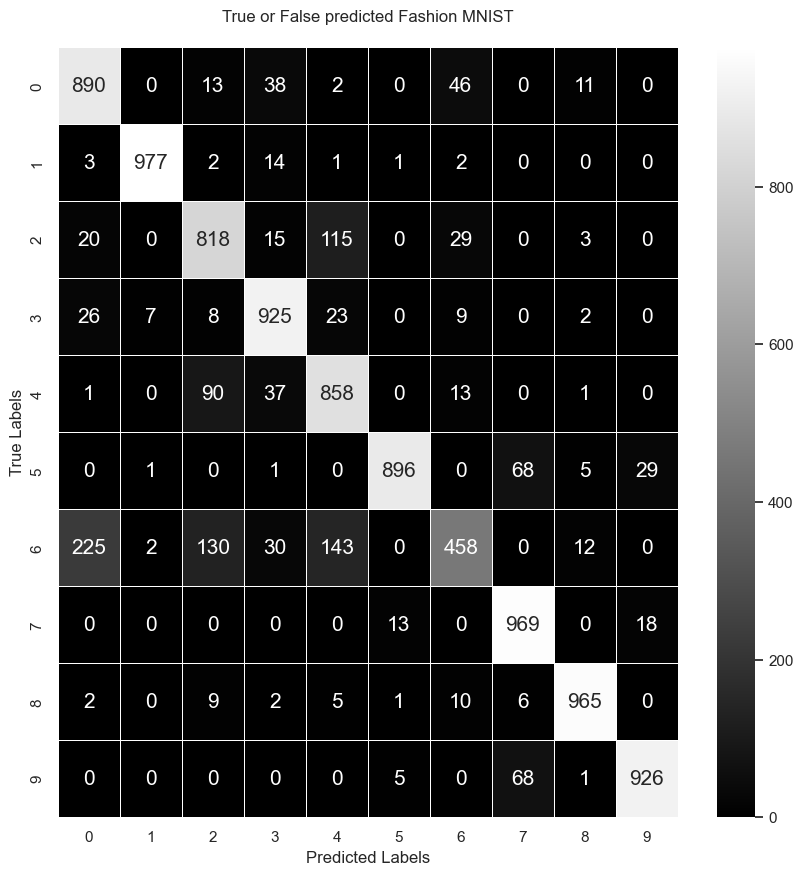

In [17]:
# Confusion matrix for Fashion MNIST
con_mat = confusion_matrix(y_test_fash_eval, y_predict_fash)

sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 10))
sns.heatmap(con_mat, annot=True, annot_kws={'size': 15}, linewidths=0.5, fmt="d", cmap="gray")
plt.title("True or False predicted Fashion MNIST\n")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test_fash_eval,y_predict_fash))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82      1000
           1       0.99      0.98      0.98      1000
           2       0.76      0.82      0.79      1000
           3       0.87      0.93      0.90      1000
           4       0.75      0.86      0.80      1000
           5       0.98      0.90      0.94      1000
           6       0.81      0.46      0.58      1000
           7       0.87      0.97      0.92      1000
           8       0.96      0.96      0.96      1000
           9       0.95      0.93      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.86     10000
weighted avg       0.87      0.87      0.86     10000



In [19]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


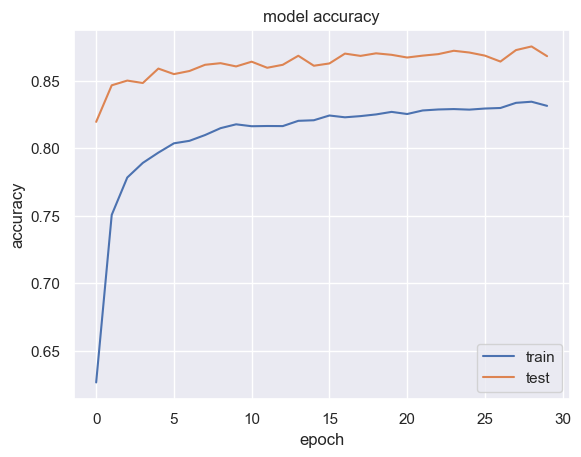

In [20]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

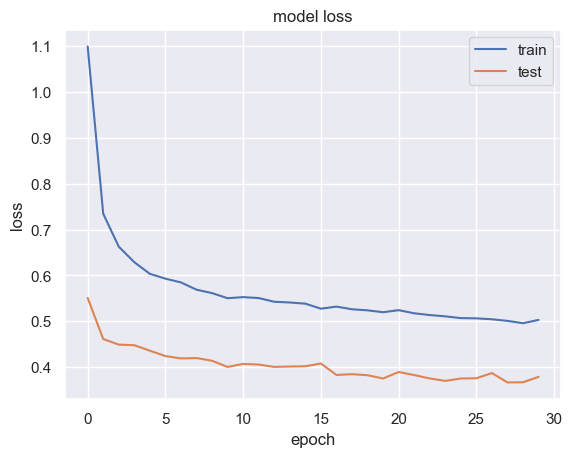

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [22]:
#tf.expand_dims(X_test_fashion[0])
y_predict = model.predict(X_test_fashion.loc[[0],:].values)
y_predict=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_fash_eval=np.argmax(y_test_fashion, axis=1)

1/1 [==============================] - 0s 115ms/step


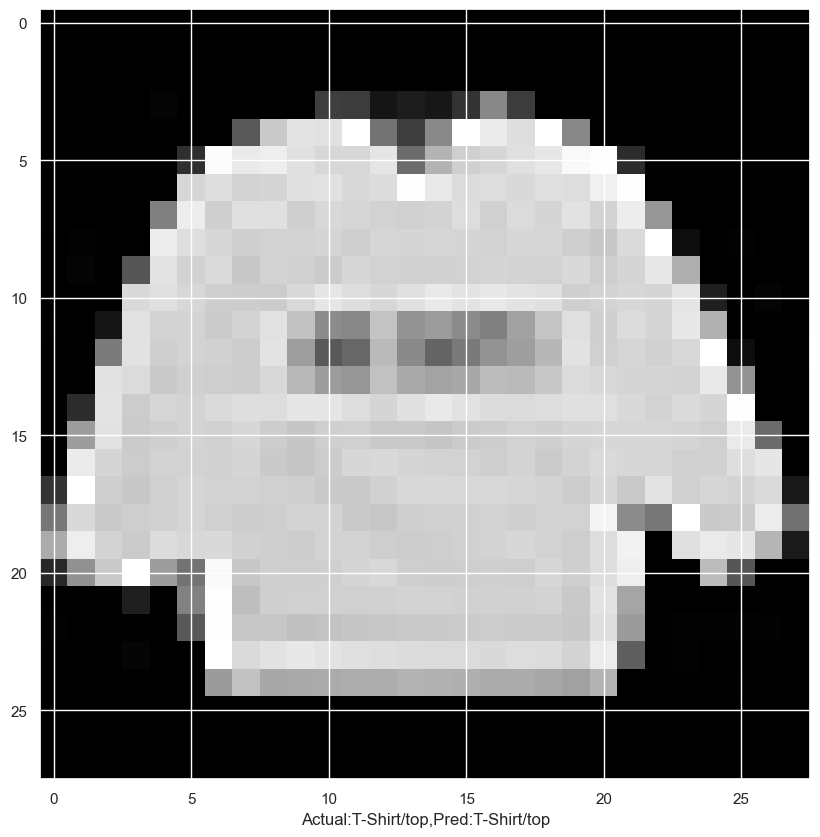

In [23]:
# Names of clothing accessories in order 
col_name = ['T-Shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

# Visualizing the first image from the test set
plt.figure(figsize=(10, 10))
plt.imshow(x_train_reshape[0], cmap='gray')  # Display the first image
plt.xlabel("Actual:{},Pred:{}".format(col_name[np.argmax(y_test_fashion[0])],col_name[y_predict[0]]))
plt.show()